In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")
df=pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")
df.head()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df.dropna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# Selecting relevant columns for our analysis

selected_columns = ['symboling', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'horsepower', 'citympg', 'highwaympg', 'enginetype', 'drivewheel', 'fueltype', 'price']

df = df[selected_columns].copy()
df

,symboling,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,enginetype,drivewheel,fueltype,price
0,3,168.8,64.1,48.8,2548,130,111,21,27,dohc,rwd,gas,13495.0
1,3,168.8,64.1,48.8,2548,130,111,21,27,dohc,rwd,gas,16500.0
2,1,171.2,65.5,52.4,2823,152,154,19,26,ohcv,rwd,gas,16500.0
3,2,176.6,66.2,54.3,2337,109,102,24,30,ohc,fwd,gas,13950.0
4,2,176.6,66.4,54.3,2824,136,115,18,22,ohc,4wd,gas,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,188.8,68.9,55.5,2952,141,114,23,28,ohc,rwd,gas,16845.0
201,-1,188.8,68.8,55.5,3049,141,160,19,25,ohc,rwd,gas,19045.0
202,-1,188.8,68.9,55.5,3012,173,134,18,23,ohcv,rwd,gas,21485.0
203,-1,188.8,68.9,55.5,3217,145,106,26,27,ohc,rwd,diesel,22470.0


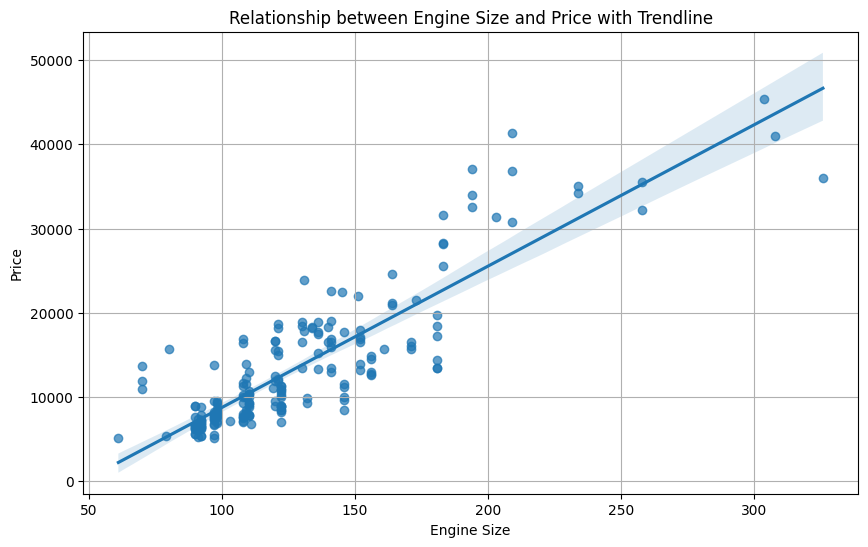

In [ ]:
# Graphs showing relationships between independent variables and price

plt.figure(figsize=(10, 6))
sns.regplot(x='enginesize', y='price', data=df, scatter_kws={'alpha':0.7})
plt.title('Relationship between Engine Size and Price with Trendline')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Axes: xlabel='fueltype', ylabel='price'>

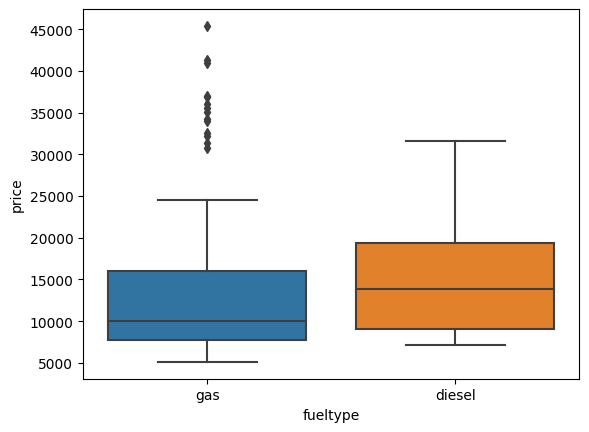

In [ ]:
sns.boxplot(data=df, x='fueltype', y='price')

<Axes: xlabel='drivewheel', ylabel='price'>

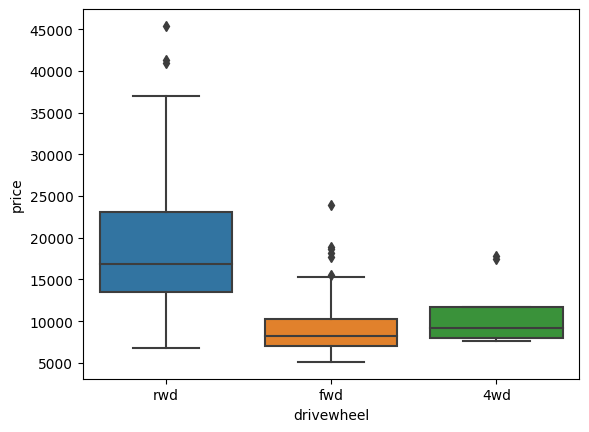

In [ ]:
sns.boxplot(data=df, x='drivewheel', y='price')

<ipython-input-5-50ce976f034e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


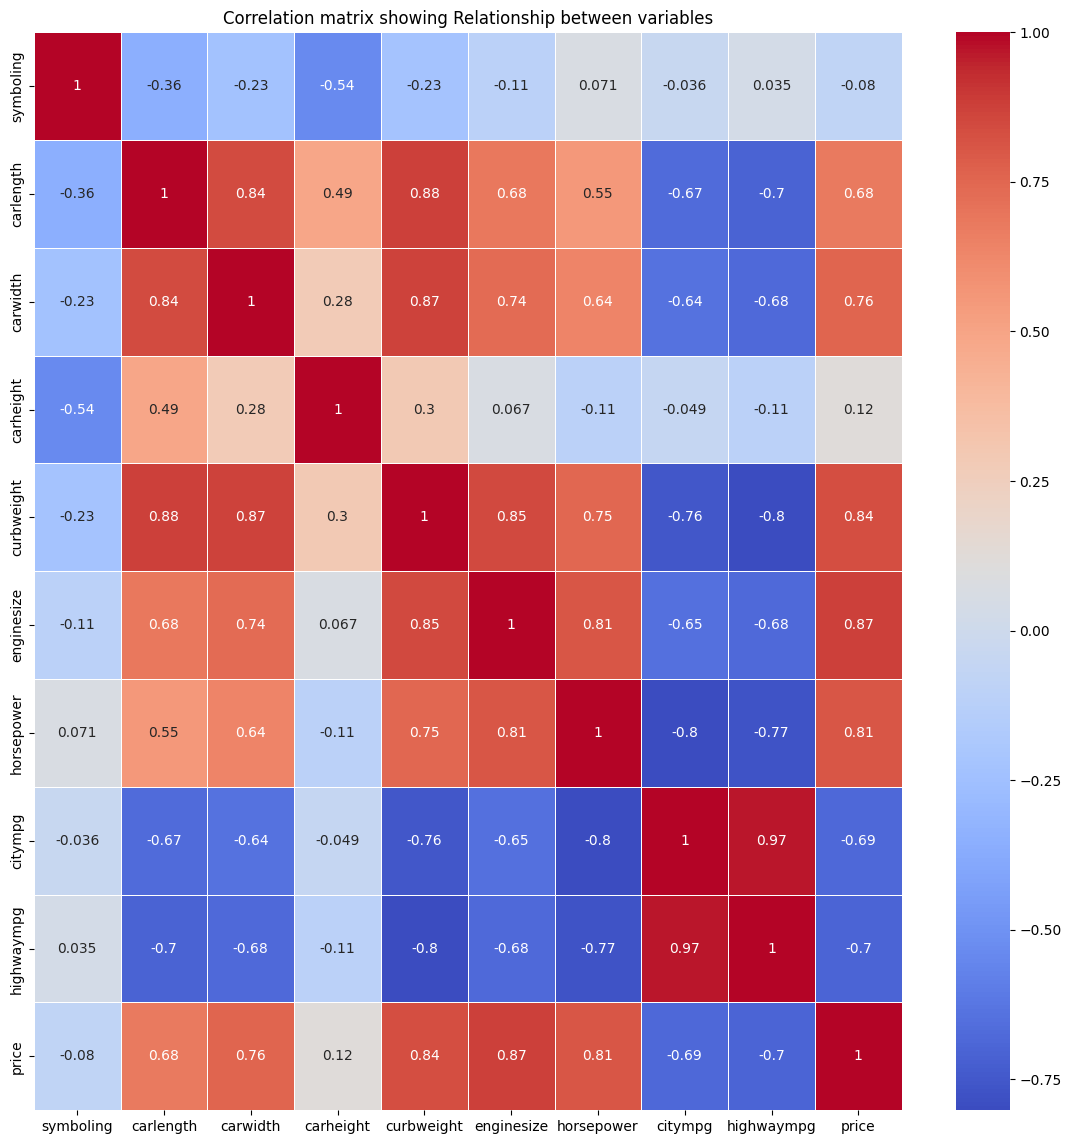

In [ ]:
corr = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix showing Relationship between variables")
plt.show()

In [ ]:
# Create the dummy variables for categorical variables:
df_dummy = pd.get_dummies(data=df, drop_first=True,dtype='int8')
df_dummy

,symboling,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,fueltype_gas
0,3,168.8,64.1,48.8,2548,130,111,21,27,13495.0,0,0,0,0,0,0,0,1,1
1,3,168.8,64.1,48.8,2548,130,111,21,27,16500.0,0,0,0,0,0,0,0,1,1
2,1,171.2,65.5,52.4,2823,152,154,19,26,16500.0,0,0,0,0,1,0,0,1,1
3,2,176.6,66.2,54.3,2337,109,102,24,30,13950.0,0,0,1,0,0,0,1,0,1
4,2,176.6,66.4,54.3,2824,136,115,18,22,17450.0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,188.8,68.9,55.5,2952,141,114,23,28,16845.0,0,0,1,0,0,0,0,1,1
201,-1,188.8,68.8,55.5,3049,141,160,19,25,19045.0,0,0,1,0,0,0,0,1,1
202,-1,188.8,68.9,55.5,3012,173,134,18,23,21485.0,0,0,0,0,1,0,0,1,1
203,-1,188.8,68.9,55.5,3217,145,106,26,27,22470.0,0,0,1,0,0,0,0,1,0


In [ ]:
# Specify the predictor and the target
y = df_dummy['price']
x = df_dummy.drop(columns='price')

# Add a constant to the model (statsmodels doesn't do this by default)
x_with_constant = sm.add_constant(x)

# Create and Fit the initial model
# y = m x + b
model = sm.OLS(y, x_with_constant).fit()

# Display the summary results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     65.60
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.77e-70
Time:                        18:03:11   Log-Likelihood:                -1928.0
No. Observations:                 205   AIC:                             3894.
Df Residuals:                     186   BIC:                             3957.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.123e+04   1.58e+04  

In [ ]:
# Optimising the model by removing certain variables

while True:
    # rerun the model
    model = sm.OLS(y,x).fit()

    # Get all the pvalues from the model
    pvalues = model.pvalues.round(3)

    # find the biggest pvalue
    max_pvalue = pvalues.max()

    # compare the max pvalue against threshold of 5%
    if max_pvalue > 0.05:
        # identify it and remove it from regression
        insig_feature = pvalues.idxmax()
        x = x.drop(columns=insig_feature)
        print(f"{insig_feature} is removed from regression due to a pvalue of {max_pvalue}")
    else:
        break

# print out the final model results
print(model.summary())

enginetype_dohcv is removed from regression due to a pvalue of 0.986
highwaympg is removed from regression due to a pvalue of 0.913
drivewheel_fwd is removed from regression due to a pvalue of 0.909
symboling is removed from regression due to a pvalue of 0.701
enginetype_l is removed from regression due to a pvalue of 0.696
carwidth is removed from regression due to a pvalue of 0.492
curbweight is removed from regression due to a pvalue of 0.231
enginetype_ohcf is removed from regression due to a pvalue of 0.107
enginetype_ohc is removed from regression due to a pvalue of 0.32
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              491.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):     

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              491.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                   2.57e-129
Time:                        18:03:29   Log-Likelihood:                         -1944.8
No. Observations:                 205   AIC:                                      3908.
Df Residuals:                     196   BIC:                                      3938.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
# Prediction and Accuracy
# Make a prediction with the model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(x)
print(y_pred)

# Evaluate model fit with R2
model.rsquared.round(3)

# Evaluate prediction accuracy with RMSE = SQRT(MSE)
model.mse_resid ** 0.5


0      14861.710196
1      14861.710196
2      16623.305412
3      10184.518146
4      15508.540865
           ...     
200    16137.256727
201    18707.778962
202    18237.654815
203    19045.034973
204    16902.128591
Length: 205, dtype: float64


3263.0571924365677

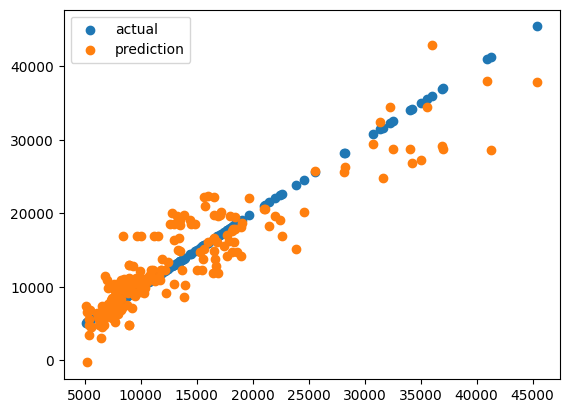

In [ ]:
# visualization of actual and prediction for Car Price
plt.scatter(x=df_dummy['price'], y=y, label='actual')
plt.scatter(x=df_dummy['price'], y=y_pred, label='prediction')
plt.legend()